In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
Finance = pd.read_csv("Campaign_Finance_-_FPPC_Form_460_-_Schedule_A_-_Monetary_Contributions.csv")
Finance.head()

/Users/katiawilliams/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,16,17,22,26,28,31,32,33,34,35,36,39,40,41,42,43,44,45,48,49,50,51,52,54,55,58,59,60,61,63,67,68,69,73,74,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Filer_ID,Filer_NamL,Report_Num,Committee_Type,Rpt_Date,From_Date,Thru_Date,Elect_Date,tblCover_Office_Cd,tblCover_Offic_Dscr,...,Memo_Code,Memo_RefNo,BakRef_TID,XRef_SchNm,XRef_Match,Loan_Rate,Int_CmteId,Tran_Location,Tres_Location,Intr_Location
0,1249382,12th A. D. Chinese American Democratic Club,0,RCP,01/28/2003,01/01/2002,12/31/2002,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"94127(37.735395, -122.460584)",NaN,NaN
1,1249382,12th A. D. Chinese American Democratic Club,0,RCP,01/28/2003,01/01/2002,12/31/2002,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"94104(37.791405, -122.402029)",NaN,NaN
2,1250153,12th A. D. Democratic Club,0,RCP,01/28/2003,01/01/2002,12/31/2002,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"94112(37.720647, -122.442853)",NaN,NaN
3,1250153,12th A. D. Democratic Club,0,RCP,01/08/2004,07/01/2003,12/31/2003,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"94103(37.772469, -122.411853)",NaN,NaN
4,1250153,12th A. D. Democratic Club,0,RCP,01/28/2003,01/01/2002,12/31/2002,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"94122(37.761208, -122.48469)",NaN,NaN


In [24]:
Finance.columns

Index(['Filer_ID', 'Filer_NamL', 'Report_Num', 'Committee_Type', 'Rpt_Date',
       'From_Date', 'Thru_Date', 'Elect_Date', 'tblCover_Office_Cd',
       'tblCover_Offic_Dscr', 'Rec_Type', 'Form_Type', 'Tran_ID', 'Entity_Cd',
       'Tran_NamL', 'Tran_NamF', 'Tran_NamT', 'Tran_NamS', 'Tran_Adr1',
       'Tran_Adr2', 'Tran_City', 'Tran_State', 'Tran_Zip4', 'Tran_Emp',
       'Tran_Occ', 'Tran_Self', 'Tran_Type', 'Tran_Date', 'Tran_Date1',
       'Tran_Amt1', 'Tran_Amt2', 'Tran_Dscr', 'Cmte_ID', 'Tres_NamL',
       'Tres_NamF', 'Tres_NamT', 'Tres_NamS', 'Tres_Adr1', 'Tres_Adr2',
       'Tres_City', 'Tres_State', 'Tres_Zip', 'Intr_NamL', 'Intr_NamF',
       'Intr_NamT', 'Intr_NamS', 'Intr_Adr1', 'Intr_Adr2', 'Intr_City',
       'Intr_State', 'Intr_Zip4', 'Intr_Emp', 'Intr_Occ', 'Intr_Self',
       'Cand_NamL', 'Cand_NamF', 'Cand_NamT', 'Cand_NamS',
       'tblDetlTran_Office_Cd', 'tblDetlTran_Offic_Dscr', 'Juris_Cd',
       'Juris_Dscr', 'Dist_No', 'Off_S_H_Cd', 'Bal_Name', 'Bal_Num',
    

Let's see who's getting the most funding!

We check the docs and see the column types with "payee" in them. That's a good sign! We'll also take "Tran_Amt1"



In [39]:
fin_payees = Finance.loc[:,["Cand_NamT", "Cand_NamF", "Cand_NamL", "Cand_NamS", "Tran_Amt1"]]
fin_payees.head()

,Cand_NamT,Cand_NamF,Cand_NamL,Cand_NamS,Tran_Amt1
0,NaN,NaN,NaN,NaN,250.0
1,NaN,NaN,NaN,NaN,4000.0
2,NaN,NaN,NaN,NaN,300.0
3,NaN,NaN,NaN,NaN,4000.0
4,NaN,NaN,NaN,NaN,250.0


Oh no! They don't give us the payee names! Interesting...

Quick sanity check: How many rows don't have a candidate last name compared to the total number of rows?

In [41]:
sum(pd.isnull(fin_payees['Cand_NamL']))

359921

In [42]:
len(fin_payees)

359922

They are almost all null. Superb, no one reports on who they're giving to!

Maybe we can get some information from the organizations giving money though. Which orgs gave the most money?

In [43]:
fin_payees[pd.notnull(fin_payees['Cand_NamL'])]

,Cand_NamT,Cand_NamF,Cand_NamL,Cand_NamS,Tran_Amt1
10060,NaN,NaN,n,NaN,20030527.0


In [28]:
fin_orgs = Finance.loc[:,["Filer_NamL", "Tran_Amt1"]]
fin_orgs.head()

,Filer_NamL,Tran_Amt1
0,12th A. D. Chinese American Democratic Club,250.0
1,12th A. D. Chinese American Democratic Club,4000.0
2,12th A. D. Democratic Club,300.0
3,12th A. D. Democratic Club,4000.0
4,12th A. D. Democratic Club,250.0


In [48]:
fin_orgs.groupby("Filer_NamL").sum().sort_values("Tran_Amt1", ascending=False).head()

,Tran_Amt1
Filer_NamL,
Angela Alioto for Mayor 2003,60446189.50
"NO ON V, ENOUGH IS ENOUGH: DON'T TAX OUR GROCERIES, WITH MAJOR FUNDING BY AMERICAN BEVERAGE ASSOCIATION CALIFORNIA PAC",22244347.02
Dennis Herrera for City Attorney 2015,20290904.92
"COMMITTEE TO STOP THE BLANK CHECK, NO ON H, A COALITION OF CONCERNED CONSUMERS, SMALL BUSINESSES, LABOR, COMMUNITY ORGANIZATIONS AND PACIFIC GAS AND ELECTRIC COMPANY",9500100.00
"NO ON E: STOP UNFAIR BEVERAGE TAXES, COALITION FOR AN AFFORDABLE CITY, WITH MAJOR FUNDING BY AMERICAN BEVERAGE ASSOCIATION CALIFORNIA PAC",9226152.54


Looks like Angela Alioto for Mayor 2003 by far had the most money on this list. Dang! This gets me thinking about years. What has campaign contribution looked like over time since 1998?

We'll do it by year.

In [35]:
fin_time = Finance.loc[:, ["From_Date", "Tran_Amt1"]]
fin_time.head()

,From_Date,Tran_Amt1
0,01/01/2002,250.0
1,01/01/2002,4000.0
2,01/01/2002,300.0
3,07/01/2003,4000.0
4,01/01/2002,250.0


The following code extracts the year from the from date. Don't worry about it too much

In [47]:
fin_time.loc[:, "Year"] = [str(d)[6:10] for d in fin_time['From_Date']]
fin_year = fin_time[['Year', 'Tran_Amt1']].groupby('Year').sum().reset_index()
fin_year.head()

,Year,Tran_Amt1
0,,15550.00
1,1998,4599133.09
2,1999,8385647.35
3,2000,17559067.52
4,2001,4637898.20


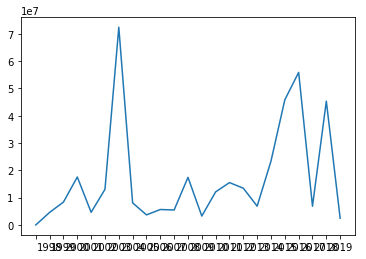

In [32]:
plt.plot(fin_year['Year'], fin_year['Tran_Amt1']);

There seem to be a few spikes during some years where a lot of money is being tossed around! Let's see when those are

In [33]:
fin_year.sort_values('Tran_Amt1', ascending=False).head()

,Year,Tran_Amt1
6,2003,7.239786e+07
19,2016,5.586994e+07
18,2015,4.582028e+07
21,2018,4.533975e+07
17,2014,2.337976e+07


This is in line with what we found out earlier about that 2003 election that got so much money!
It's also unsurprising to see 2015-2016 up there (the last presidential election) and 2018 (the last midterm election)

We can also look at it as a histogram to see the distribution of yearly transactions

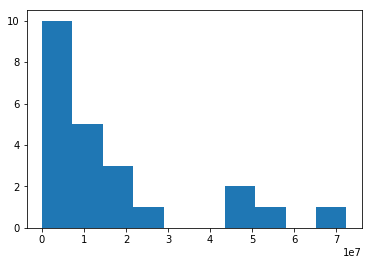

In [34]:
plt.hist(fin_year['Tran_Amt1']);

Most years see up to \\$10 million in donations or less total, but a few see as much as \\$70-\\$80 million (as we saw earlier)

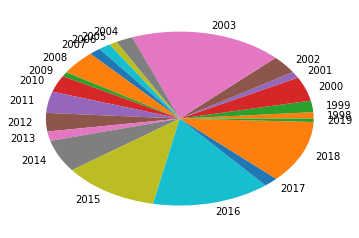

In [45]:
plt.pie(fin_year['Tran_Amt1'], labels = fin_year['Year']);